## Sentinel 3: SLSTR Data (Looking at Land Surface Temperature)

The Copernicus Data Space Ecosystem (https://dataspace.copernicus.eu) is an open ecosystem that provides free instant access to a wide range of data and services from the Copernicus Sentinel missions. 

The third sentinel mission,Sentinel-3, is a multi-instrument mission to measure sea surface topography, sea and land surface temperature, ocean colour and land colour with high end accuracy and reliability. The mission supports ocean forecasting systems, as well as environmental and climate monitoring. Sentinel-3A was launched on 16 February 2016 and Sentinel-3B joined its twin in orbit on 25 April 2018.

One of the instruments on this satellite was the Sea and Land Surface Temperature Radiometer (SLSTR). From the Copernicus Data Space Ecosystem, four NetCDF files providing Level 1 Sentinel-3 land surface temperature data can be downloaded, which were measured using the SLSTR instrument. 

In [1]:
#%matplotlib inline 
# this line is required for the plots to appear in the Jupyter cells, rather than launching the matplotlib GUI
%matplotlib notebook
#this allows interactive view but you need to be in classic rather than CoCalc Jupyter notebook for this to work

import matplotlib

import numpy as np

import matplotlib.pyplot as plt


# Let printing work the same in Python 2 and 3
from __future__ import division,print_function

# notice two underscores _ either side of future

import xarray as xr
import netCDF4 as nc

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [22]:
#data = xr.open_dataset(r"/Users/anvijoy/Desktop/Anvi/Uni Notes/Internal Placement/LST_in-5.nc")
data = xr.open_mfdataset(r"/Users/anvijoy/Desktop/Anvi/Uni Notes/Internal Placement/LST_in-5.nc", combine='nested', concat_dim='time')

In [23]:
print(data.data_vars)

Data variables:
    LST                     (time, rows, columns) float32 7MB dask.array<chunksize=(1, 1200, 1500), meta=np.ndarray>
    LST_orphan              (time, rows, orphan_pixels) float32 898kB dask.array<chunksize=(1, 1200, 187), meta=np.ndarray>
    LST_uncertainty         (time, rows, columns) float32 7MB dask.array<chunksize=(1, 1200, 1500), meta=np.ndarray>
    LST_uncertainty_orphan  (time, rows, orphan_pixels) float32 898kB dask.array<chunksize=(1, 1200, 187), meta=np.ndarray>
    exception               (time, rows, columns) int16 4MB dask.array<chunksize=(1, 1200, 1500), meta=np.ndarray>
    exception_orphan        (time, rows, orphan_pixels) int16 449kB dask.array<chunksize=(1, 1200, 187), meta=np.ndarray>


In [24]:
# Prints all the dimensions listed in the .nc file
print(data.dims)

FrozenMappingWarningOnValuesAccess({'time': 1, 'rows': 1200, 'columns': 1500, 'orphan_pixels': 187})


In [25]:
# Prints all the attributes listed in the .nc file
print(data.attrs)

{'absolute_orbit_number': 37440, 'comment': ' ', 'contact': 'eosupport@copernicus.esa.int', 'creation_time': '20250703T132318Z', 'history': '  2025-07-03T13:23:18Z: PUGCoreProcessor /data/WORK/PUG_S3B_SL_2_LST-03.50/100058190/JobOrder.100058190.xml', 'institution': 'ESA', 'netCDF_version': '4.2 of Mar 13 2018 10:14:33 $', 'processing_baseline': 'SL__LST.004.08.00', 'product_name': 'S3B_SL_2_LST____20250703T105737_20250703T110037_20250703T132318_0179_108_208_1980_ESA_O_NR_004.SEN3', 'references': 'S3IPF PDS 005.2 - i2r10 - Product Data Format Specification - SLSTR Level 2 Land, S3IPF PDS 002 - i1r8 - Product Data Format Specification - Product Structures, S3IPF DPM 007 - i1r14 - Detailed Processing Model - SLSTR Level 2', 'resolution': '[ 1000 1000 ]', 'source': 'IPF-SL-2 06.24', 'start_offset': 13391, 'start_time': '2025-07-03T10:57:36.736761Z', 'stop_time': '2025-07-03T11:00:36.430405Z', 'title': 'SLSTR Level 2 Product, Land Surface Temperature measurement', 'track_offset': 998}


In [26]:
# Prints the data of the variable
print(data.LST)

<xarray.DataArray 'LST' (time: 1, rows: 1200, columns: 1500)> Size: 7MB
dask.array<broadcast_to, shape=(1, 1200, 1500), dtype=float32, chunksize=(1, 1200, 1500), chunktype=numpy.ndarray>
Dimensions without coordinates: time, rows, columns
Attributes:
    long_name:      Gridded Land Surface Temperature
    standard_name:  surface_temperature
    units:          K
    valid_max:      32767
    valid_min:      -32767


In [27]:
# Variables can be converted to numpy arrays
data_one_year = data.LST.values
data_all_months = data.LST.values

# Print the shape of the numpy array
print(data_one_year.shape)
print(data_all_months.shape)

(1, 1200, 1500)
(1, 1200, 1500)


In [28]:
print(data_one_year)

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]


<IPython.core.display.Javascript object>


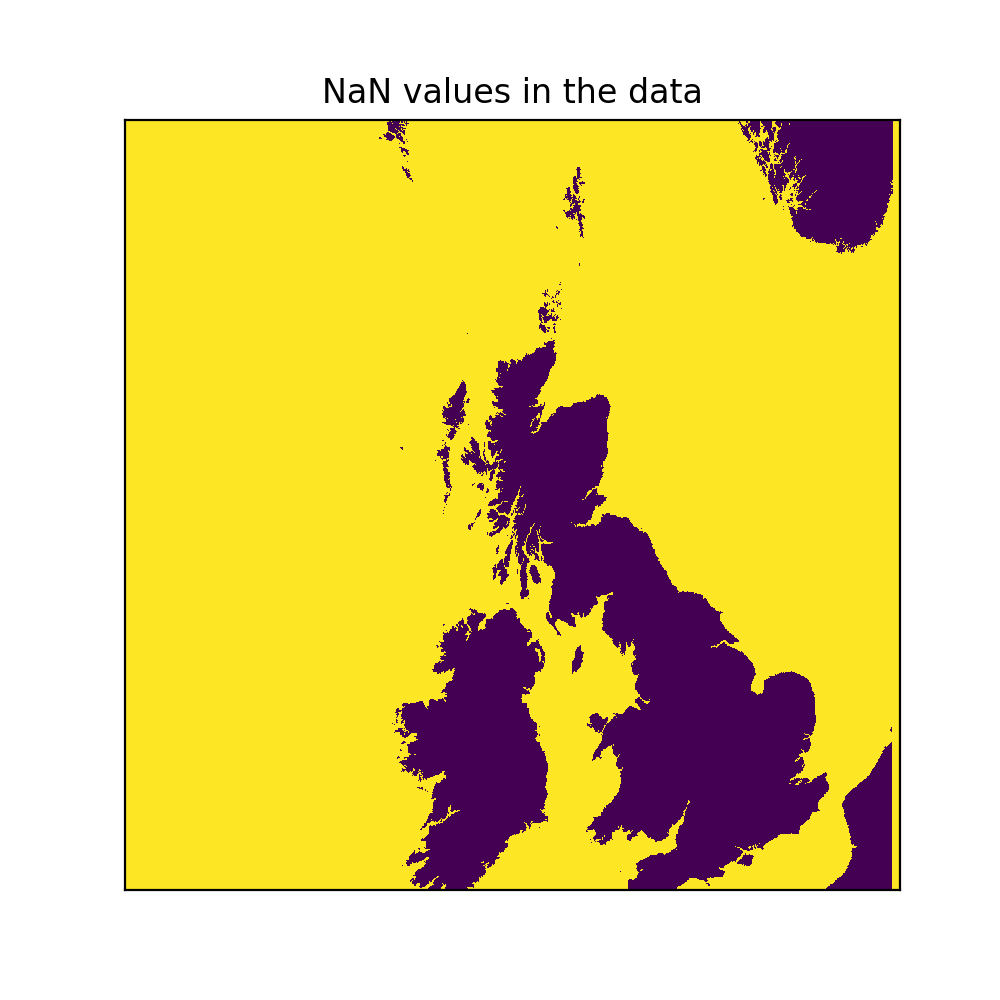

In [32]:
#temperature_data = data['LST']

#temperature_data = data['LST'].sortby('lat')

temperature_data = data['LST'].isel(rows=slice(None, None, -1))  


plt.figure(figsize=(5, 5))
ax = temperature_data.isnull().sum(dim='time').plot(add_colorbar=False)
plt.title('NaN values in the data')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.show()

In [41]:
temperature_data = data['LST'].isel(rows=slice(None, None, -1))

arr = temperature_data.values 

max_to_print = 100
count = 0

for t in range(arr.shape[0]):      
    for i in range(arr.shape[1]):   
        for j in range(arr.shape[2]): 
            value = arr[t, i, j]
            if not np.isnan(value):
                print(f"Time={t}, row={i}, col={j}: {value}")
                count += 1
                if count >= max_to_print:
                    print(f"\nStopped after printing {max_to_print} non-NaN values.")
                    break
        if count >= max_to_print:
            break
    if count >= max_to_print:
        break

Time=0, row=0, col=584: 291.61199951171875
Time=0, row=0, col=585: 291.61199951171875
Time=0, row=0, col=587: 296.3320007324219
Time=0, row=0, col=589: 295.3219909667969
Time=0, row=0, col=590: 295.22198486328125
Time=0, row=0, col=591: 292.07598876953125
Time=0, row=0, col=592: 292.07598876953125
Time=0, row=0, col=593: 287.4620056152344
Time=0, row=0, col=594: 281.64599609375
Time=0, row=0, col=595: 283.4880065917969
Time=0, row=0, col=596: 279.2439880371094
Time=0, row=0, col=597: 278.75201416015625
Time=0, row=0, col=598: 278.75201416015625
Time=0, row=0, col=599: 278.489990234375
Time=0, row=0, col=600: 280.2279968261719
Time=0, row=0, col=601: 286.2279968261719
Time=0, row=0, col=602: 286.19000244140625
Time=0, row=0, col=603: 283.1340026855469
Time=0, row=0, col=617: 291.47198486328125
Time=0, row=0, col=618: 294.70001220703125
Time=0, row=0, col=619: 296.37200927734375
Time=0, row=0, col=620: 295.6319885253906
Time=0, row=0, col=621: 295.6319885253906
Time=0, row=0, col=622: 29